In [1]:
import torch
from transformers import T5ForConditionalGeneration,T5Tokenizer

/home/sanatan/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [2]:
import pandas as pd

In [4]:
valid_df = pd.read_csv('model/t5/dataset/squad_t5_val.csv')

In [2]:
trained_model_path = 'model/t5/model/'
trained_tokenizer = 'model/t5/tokenizer/'

In [3]:
model = T5ForConditionalGeneration.from_pretrained(trained_model_path)
tokenizer = T5Tokenizer.from_pretrained(trained_tokenizer)

In [4]:
text = """Photosynthesis is a complex biochemical process that enables plants, algae, and some bacteria to harness energy from sunlight and convert it into chemical energy. It is a fundamental process that sustains life on Earth and is responsible for the production of oxygen and the synthesis of organic compounds. During photosynthesis, plants absorb light energy through specialized pigments, primarily chlorophyll, located in their chloroplasts. This absorbed light energy drives a series of chemical reactions that transform carbon dioxide and water into glucose and oxygen. In this process, carbon dioxide is converted into organic molecules, while water molecules are split, releasing oxygen as a byproduct. The glucose produced during photosynthesis serves as a source of energy and as a building block for the synthesis of other organic compounds, such as carbohydrates, lipids, and proteins. Additionally, photosynthesis plays a crucial role in maintaining the balance of atmospheric gases by removing carbon dioxide and releasing oxygen. It is an essential process for global carbon cycling and the regulation of Earth's climate. Overall, photosynthesis is a remarkable biological process that not only sustains plant life but also has a profound impact on the ecosystem and the well-being of all living organisms."""

In [5]:
text_2 = """Machine learning is a field of study that focuses on developing algorithms and models that enable computers to learn from data and make predictions or decisions without being explicitly programmed. It is a subset of artificial intelligence that aims to create systems that can automatically learn and improve from experience.

At the core of machine learning is the idea that computers can identify patterns and extract meaningful insights from data, allowing them to make accurate predictions or take intelligent actions. This process involves training a model using a large amount of labeled data, where the model learns the underlying patterns and relationships within the data.

There are various types of machine learning algorithms, including supervised learning, unsupervised learning, and reinforcement learning. In supervised learning, models are trained using labeled data, where the input features are mapped to their corresponding output labels. This allows the model to learn the relationship between the input and output and make predictions on unseen data.

Unsupervised learning, on the other hand, involves training models on unlabeled data, where the goal is to discover hidden patterns or structures within the data. Clustering and dimensionality reduction are common techniques used in unsupervised learning.

Reinforcement learning is a paradigm where an agent learns to interact with an environment through trial and error. The agent receives feedback in the form of rewards or penalties based on its actions, allowing it to learn the optimal behavior or strategy.

Machine learning finds applications in various domains, including image and speech recognition, natural language processing, recommendation systems, fraud detection, and autonomous vehicles, to name just a few. It has revolutionized industries and transformed the way we tackle complex problems by providing data-driven insights and enabling automation."""

In [6]:
from generator1 import get_distractors

2024-04-11 08:04:59.046218: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-11 08:05:00.558404: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-04-11 08:05:00.558471: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-04-11 08:05:05.654144: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-

In [7]:
from distractors import *

: 

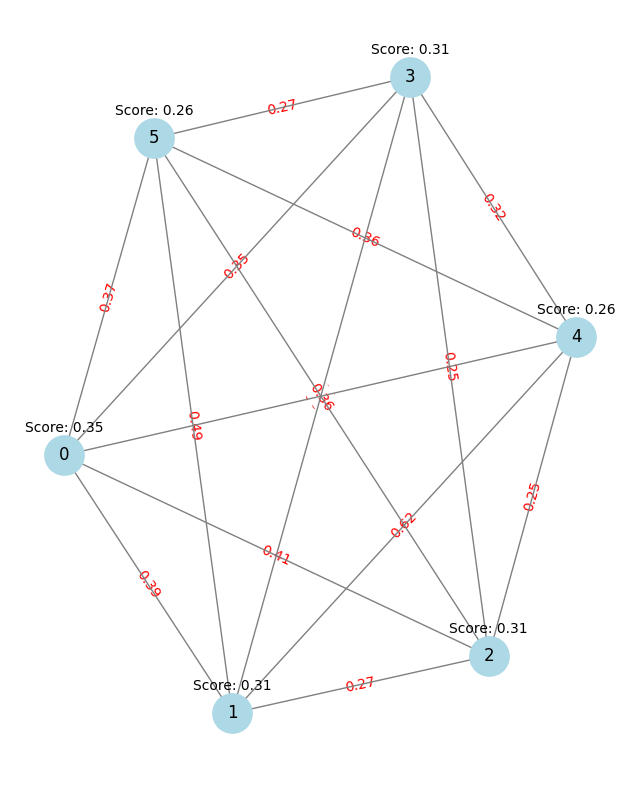

In [ ]:
from model2 import *

stopWords = ['ever', 'under', 'although', 'eight', 'many', 'toward', 'would', 'thru', 'her', 'thereby', 'in', 'meanwhile', 'per', 'seeming', 'whereupon', 'anywhere', 'empty', 'then', 'there', 'here', 'twelve', 'my', 'nowhere', 'some', 'ourselves', '‘ll', 'itself', 'only', 'seemed', 'these', 'such', 'much', 'less', 'ten', 'hence', 'this', 'as', 'also', 'wherever', 'while', 'done', 'moreover', 'three', 'than', 'becomes', 'of', 'yourself', 'were', 'nothing', 'an', 'nor', 'enough', 'his', '’re', 'does', 'they', 'even', 'behind', 'may', 'take', 'afterwards', 'have', 'for', 'formerly', 'something', 'now', 'put', 'ours', 'eleven', 'none', 'out', 'besides', 'again', 'hers', 'first', 'via', 'anyhow', 'latter', 'its', 'whereby', 'hundred', 'say', 'hereby', 'not', 'with', 'often', 'a', 'before', 'but', 'each', 'becoming', 'full', 'from', 'within', 'both', 'below', 'others', 'show', 'whenever', 'too', 'mostly', 'anyway', 'mine', 'once', 'yourselves', 'hereafter', 'another', 'is', 'serious', 'few', 'together', 'might', 'go', 'n’t', 'into', 'whole', 'keep', 'thereafter', 'to', 'whither', 'how', 'further', 'otherwise', '’ll', 'due', 'fifteen', 'whether', 'sixty', 'always', 'amount', 'without', 'where', 'myself', 'who', 'using', 'by', 'made', 'should', 'what', 'nine', 'must', 'indeed', 'being', 'do', 'almost', 'up', 'hereupon', 'namely', 'however', 'amongst', 'it', 'most', 'off', 'your', 'bottom', 'so', 'him', 'perhaps', "'re", 'two', 'seems', 'regarding', 'various', '‘re', 'became', 'are', 'did', 'be', 'thus', 'move', 'and', 'above', 'ca', 'i', 'across', 'all', 'part', 'throughout', 'used', 'six', 'own', 'towards', "'s", 'quite', 'noone', 'them', 'along', "'ve", 'nevertheless', 'upon', 'someone', 'third', 'whatever', 'because', 'five', 'had', 'thereupon', "'ll", 'therefore', "'m", 'beforehand', 'please', 'any', 'am', '‘d', 'several', 'cannot', 'on', '’d', 'over', '‘m', 'the', 'us', 'onto', '’m', 'make', 'twenty', 'four', 'latterly', 'next', 'other', 'through', 'when', 'whoever', 'against', 'except', 'everywhere', 'you', 'our', 'me', "'d", '’s', 'during', 'that', '‘s', 'whom', 'if', 'more', 'n‘t', 'yet', 'never', 'was', 'just', 'anyone', 'same', 'top', 'can', 'beside', 'we', 'really', 'herein', 'fifty', 'somehow', 'among', 'she', 'could', 'though', 'beyond', 'else', 'well', 'nobody', 'whence', 'neither', 'until', 'last', 'seem', 'after', 'will', 'has', 'see', 'since', 'sometimes', 'wherein', 'anything', 'least', 'down', 'no', 'whereas', 'herself', 'himself', 'whereafter', 'very', 'been', 'doing', 'between', 'alone', 'everyone', 'still', 'those', 'at', 'thence', 'therein', 'already', '’ve', 'one', 'why', 'get', 'rather', 'former', 'side', 'or', 'every', 'forty', 'he', 'around', 'everything', 'their', 'become', 've', 'which', 'name', 're', 'either', "n't", 'back', 'sometime', 'front', 'call', 'elsewhere', 'whose', 'unless', 'themselves', 'give', 'yours', 'about', 'somewhere']
summary = tfidf(text.split('.'),stopWords)
summarized_text = ". ".join(tfidf(text.split('.'), stopWords))
summary,ply,p = text_rank(text)
summarized_text_2 = ". ".join(tfidf(text2.split('.'), stopWords))

In [ ]:
keywords = get_keywords(summarized_text,text)[0]

In [ ]:
keywords_2 = get_keywords(summarized_text_2,text2)[0]

/home/sanatan/.local/lib/python3.8/site-packages/spacy/util.py:837: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5 and may not be 100% compatible with the current version (3.3.3). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [ ]:
from distract import get_distract

In [ ]:
from get_distractors__sense2vec import get_options

 Sense2vec_distractors successful for word :  chloroplasts
['Living Cells', 'Plant Cells', 'Photosynthesis']


In [ ]:
for j in keywords:
    text = "context: {} answer: {} </s>".format(summarized_text, j)
    ques = question(text)
    distractors = get_options(j)
    distractors.append(j)
    for i in distractors:
        print(i)

dict_keys(['input_ids', 'attention_mask'])


question: What is photosynthesis responsible for the production of oxygen and synthesis of organic compounds?
 Sense2vec_distractors successful for word :  process
Final Step
Many Steps
Second Step
process
dict_keys(['input_ids', 'attention_mask'])
question: What type of organisms absorb light during photosynthesis?
 Sense2vec_distractors successful for word :  plants
Algae
Plant Life
Other Plant
plants
dict_keys(['input_ids', 'attention_mask'])
question: What is photosynthesis responsible for?
energy
dict_keys(['input_ids', 'attention_mask'])
question: What is a complex biochemical process that enables plants to harness energy from sunlight and convert it into chemical energy?
 Sense2vec_distractors successful for word :  photosynthesis
Photosynthesize
Cellular Respiration
Organic Matter
photosynthesis


In [ ]:
for j in keywords_2:
    text = "context: {} answer: {} </s>".format(summarized_text_2, j)
    ques = question(text)
    distractors = get_options(j)
    distractors.append(j)
    for i in distractors:
        print(i)

/home/sanatan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2317: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/home/sanatan/.local/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5.py:219: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


dict_keys(['input_ids', 'attention_mask'])
question: What kind of algorithms learn from historical data?
 Sense2vec_distractors successful for word :  machine learning algorithms
Algorithms
Deep Learning
Computer Programs
machine learning algorithms
dict_keys(['input_ids', 'attention_mask'])
question: What type of data do machine learning algorithms learn from?
data
dict_keys(['input_ids', 'attention_mask'])
question: What do machine learning algorithms learn from historical data?
 Sense2vec_distractors successful for word :  patterns
Particular Pattern
Specific Pattern
Certain Pattern
patterns
dict_keys(['input_ids', 'attention_mask'])
question: What do machine learning algorithms learn from historical data?
 Sense2vec_distractors successful for word :  relationships
Friendships
Close Friendships
relationships


: 

In [ ]:
text3 = ""

In [12]:
def question(text):
    encoding = tokenizer.encode_plus(text,max_length =512, padding=True, return_tensors="pt")
    print (encoding.keys())
    input_ids,attention_mask  = encoding["input_ids"].to('cpu'), encoding["attention_mask"].to('cpu')
    model.eval()
    beam_outputs = model.generate(
        input_ids=input_ids,attention_mask=attention_mask,
        max_length=72,
        early_stopping=True,
        num_beams=5,
        num_return_sequences=1
    )
    for beam_output in beam_outputs:
        sent = tokenizer.decode(beam_output, skip_special_tokens=True,clean_up_tokenization_spaces=True)
        print (sent)
                                        
    

In [17]:
model.eval()
beam_outputs = model.generate(
    input_ids=input_ids,attention_mask=attention_mask,
    max_length=72,
    early_stopping=True,
    num_beams=5,
    
    num_return_sequences=1

)
print(beam_outputs)
for beam_output in beam_outputs:
    sent = tokenizer.decode(beam_output, skip_special_tokens=True,clean_up_tokenization_spaces=True)
    print (sent)

AttributeError: 'SentenceTransformer' object has no attribute 'generate'

In [16]:
answer = "chroloplast"

In [17]:
answer

'chroloplast'

In [18]:
from get_distractors__sense2vec import get_options

print(f'Distractors : {get_options(answer)}')

/home/sanatan/.local/lib/python3.8/site-packages/torch/__init__.py:614: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:451.)
  _C._set_default_tensor_type(t)


 Sense2vec_distractors successful for word :  chloroplasts
['Living Cells', 'Plant Cells', 'Photosynthesis']
 Sense2vec_distractors failed for word :  chroloplast
Distractors : []


In [30]:
from nltk.translate.bleu_score import sentence_bleu

In [19]:
from rouge import Rouge

In [80]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores = scorer.score(question,sent)
scores

{'rouge1': Score(precision=0.42857142857142855, recall=0.375, fmeasure=0.39999999999999997),
 'rougeL': Score(precision=0.2857142857142857, recall=0.25, fmeasure=0.26666666666666666)}

In [21]:
rouge1 = []
rougeL = []
for i in range(100):
    text = "context: "+valid_df['context'][i] + " " + "answer: " +valid_df['answer'][i] + " </s>"
    encoding = tokenizer.encode_plus(text,max_length =512, padding=True, return_tensors="pt")
    input_ids,attention_mask  = encoding["input_ids"].to('cpu'), encoding["attention_mask"].to('cpu')
    model.eval()
    beam_outputs = model.generate(
        input_ids=input_ids,attention_mask=attention_mask,
        max_length=72,
        early_stopping=True,
        num_beams=5,
        num_return_sequences=1

    )

    for beam_output in beam_outputs:
        sent = tokenizer.decode(beam_output, skip_special_tokens=True,clean_up_tokenization_spaces=True)
    scores = scorer.score(valid_df['question'][i],sent)
    rouge1.append(scores['rouge1'])
    rougeL.append(scores['rougeL'])

/home/sanatan/.local/lib/python3.8/site-packages/transformers/tokenization_utils_base.py:2317: UserWarning: `max_length` is ignored when `padding`=`True` and there is no truncation strategy. To pad to max length, use `padding='max_length'`.
  warnings.warn(
/home/sanatan/.local/lib/python3.8/site-packages/transformers/models/t5/tokenization_t5.py:219: UserWarning: This sequence already has </s>. In future versions this behavior may lead to duplicated eos tokens being added.
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
rouge1

[Score(precision=0.42857142857142855, recall=0.6, fmeasure=0.5),
 Score(precision=0.42857142857142855, recall=0.42857142857142855, fmeasure=0.42857142857142855),
 Score(precision=0.3888888888888889, recall=0.6363636363636364, fmeasure=0.4827586206896552),
 Score(precision=0.46153846153846156, recall=0.5454545454545454, fmeasure=0.4999999999999999),
 Score(precision=0.3333333333333333, recall=0.6666666666666666, fmeasure=0.4444444444444444),
 Score(precision=0.2857142857142857, recall=0.3076923076923077, fmeasure=0.29629629629629634),
 Score(precision=0.1111111111111111, recall=0.25, fmeasure=0.15384615384615383),
 Score(precision=0.5555555555555556, recall=0.5555555555555556, fmeasure=0.5555555555555556),
 Score(precision=0.7, recall=0.875, fmeasure=0.7777777777777777),
 Score(precision=0.2, recall=0.3333333333333333, fmeasure=0.25),
 Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666),
 Score(precision=0.4, recall=0.25, fmeasure=0.30769230769230

In [ ]:
rougeL

[Score(precision=0.42857142857142855, recall=0.6, fmeasure=0.5),
 Score(precision=0.42857142857142855, recall=0.42857142857142855, fmeasure=0.42857142857142855),
 Score(precision=0.2777777777777778, recall=0.45454545454545453, fmeasure=0.3448275862068966),
 Score(precision=0.38461538461538464, recall=0.45454545454545453, fmeasure=0.41666666666666663),
 Score(precision=0.3333333333333333, recall=0.6666666666666666, fmeasure=0.4444444444444444),
 Score(precision=0.21428571428571427, recall=0.23076923076923078, fmeasure=0.22222222222222224),
 Score(precision=0.1111111111111111, recall=0.25, fmeasure=0.15384615384615383),
 Score(precision=0.5555555555555556, recall=0.5555555555555556, fmeasure=0.5555555555555556),
 Score(precision=0.7, recall=0.875, fmeasure=0.7777777777777777),
 Score(precision=0.2, recall=0.3333333333333333, fmeasure=0.25),
 Score(precision=0.6666666666666666, recall=0.6666666666666666, fmeasure=0.6666666666666666),
 Score(precision=0.4, recall=0.25, fmeasure=0.307692307

In [ ]:
rouge1_precision = []
rouge1_recall = []
rouge1_fmeasure = []

rougeL_precision = []
rougeL_recall = []
rougeL_fmeasure = []


In [ ]:
rouge1[i][0]

0.25

In [ ]:

for i in range(100):
    rouge1_precision.append(rouge1[i][0])
    rouge1_recall.append(rouge1[i][1])
    rouge1_fmeasure.append(rouge1[i][2])
    rougeL_precision.append(rougeL[i][0])
    rougeL_recall.append(rougeL[i][1])
    rougeL_fmeasure.append(rougeL[i][2])

In [ ]:
import matplotlib.pyplot as plt

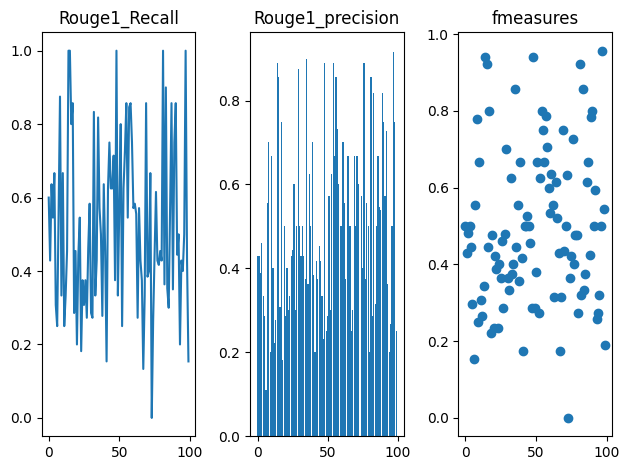

In [ ]:

x_values = range(len(rouge1_precision))
import matplotlib.pyplot as plt

# Plot 1
plt.subplot(1, 3, 1)  # Create a subplot with 1 row, 3 columns, and select the first plot
plt.plot(x_values,rouge1_recall)  # Example data for plotting
plt.title("Rouge1_Recall")  # Set the title for the plot

# Plot 2
plt.subplot(1, 3, 2)  # Select the second plot
plt.bar(x_values, rouge1_precision)  # Example data for plotting
plt.title("Rouge1_precision")

# Plot 3
plt.subplot(1, 3, 3)  # Select the third plot
plt.scatter(x_values, rouge1_fmeasure)  # Example data for plotting
plt.title("fmeasures")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

import torch
from transformers import T5ForConditionalGeneration,T5Tokenizer
summary_model = T5ForConditionalGeneration.from_pretrained('t5-base')
summary_tokenizer = T5Tokenizer.from_pretrained('t5-base')

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
summary_model = summary_model.to(device)